In [1]:

%pprint

Pretty printing has been turned OFF



## Plot Coherence by Number of Topics

In [2]:

%%time
%run ../py/html_analysis.py

lda = LdaUtilities(verbose=True)

Wall time: 11.7 s


In [3]:

%%time
from gensim.models import CoherenceModel

# Compute Coherence Scores
coherence_values = []
model_list = []
x = range(2, 27)
for num_topics in x:
    lda.build_topic_model(num_topics=num_topics, verbose=False)
    model_list.append(lda.TOPIC_MODEL)
    coherence_values.append(CoherenceModel(model=lda.TOPIC_MODEL, texts=lda.tokenized_sents_list,
                                           corpus=lda.LDA_CORPUS,
                                           dictionary=lda.LDA_DICTIONARY).get_coherence())

Wall time: 55min 36s


In [4]:

# [( 9, 0.6463805281236517), ( 2, 0.6429398632736167), ( 7, 0.620366793209093 ), ( 5, 0.6075434821227552),
#  ( 6, 0.6019667160180232), (15, 0.6007715811197316), ( 3, 0.5960575601204864), ( 4, 0.5938304287172185),
#  (13, 0.5805709737824627), (18, 0.5733355050628564), (21, 0.5720394094245893), (23, 0.5685998030087497),
#  (12, 0.5678012477947776), (11, 0.5644704138303633), (20, 0.5630337797452285), (24, 0.557101564532727 ),
#  (26, 0.5511381474614866), (19, 0.5502360229884473), ( 8, 0.5451634187316741), (25, 0.5398052837766267),
#  (17, 0.5385495488248198), (16, 0.5346121834004781), (22, 0.5285695393454447), (14, 0.5203193401560877),
#  (10, 0.4910106621162065)]
sorted([(tn, cv) for tn, cv in zip(x, coherence_values)], key=lambda x: x[1], reverse=True)

[(6, 0.6506798692613592), (8, 0.6428634288023105), (2, 0.6386811551291471), (10, 0.6177613464197951), (11, 0.6137510546870564), (9, 0.6083760438141759), (4, 0.5989893310601594), (18, 0.5790791157011324), (16, 0.5790129918336685), (7, 0.5771122990782127), (14, 0.5739254413959843), (19, 0.5684784234513209), (20, 0.5677635513272411), (5, 0.5646725656486886), (24, 0.5621244236032581), (12, 0.5614590406465743), (17, 0.5600358363003205), (13, 0.554656331718098), (15, 0.5514667803268918), (23, 0.5419984470330647), (21, 0.5283257666507948), (22, 0.525871591730365), (25, 0.5209542509655609), (26, 0.5191254641160411), (3, 0.4264948814775325)]

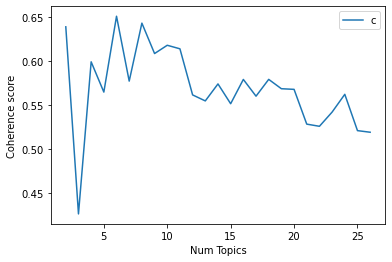

In [5]:

# Show graph
import matplotlib.pyplot as plt

plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()